<a href="https://colab.research.google.com/github/Hikaru-yokoo/EU_M_Math-Repositry/blob/main/chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

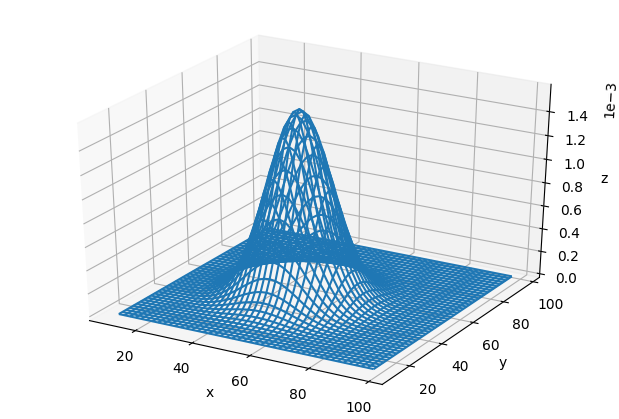

In [ ]:
#import scipy.stats as ct
from scipy .stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot  as plt

#データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y  

rv = multivariate_normal([50,50], [[100,0],[0,100]])

z = rv.pdf(pos)

fig = plt.figure(dpi = 100)
ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.ticklabel_format(style = "sci", axis = "z", scilimits = (0,0))

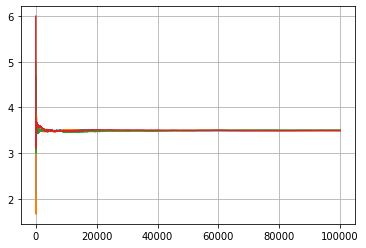

In [ ]:
from numpy.random.mtrand import sample

calc_times = 100000
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1,calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p/number_cnt)
    plt.grid(True)


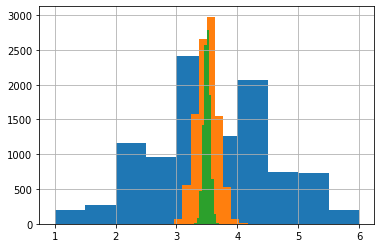

In [ ]:
def function_central_theory(N):
    sample_array = np.array([1,2,3,4,5,6])
    number_cnt = np.arange(1,N + 1)

    mean_array = np.array([])

    for i in range(10000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)

    plt.hist(mean_array)
    plt.grid(True)
  
function_central_theory(3)
function_central_theory(100)
function_central_theory(1000)


In [ ]:
import pandas as pd

student_data_math = pd.read_csv("student-mat.csv",sep=";")
student_data_por = pd.read_csv("student-por.csv",sep=";")

student_data_merge = pd.merge(student_data_math
                      ,student_data_por
                      ,on = ["school","sex", "age", "address", "famsize", "Pstatus"
                      , "Medu", "Fedu","Mjob", "Fjob", "reason", "nursery", "internet"]
                      ,suffixes = ("_math", "_por"))

print("G1数学の成績平均：",student_data_merge.G1_math.mean())
print("G1ポルトガル語の成績平均：",student_data_merge.G1_por.mean())


G1数学の成績平均： 10.861256544502618
G1ポルトガル語の成績平均： 12.112565445026178


In [ ]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math,student_data_merge.G1_por)
print("p値 = ",p)


p値 =  1.653655521710079e-16
